# Исследование данных о продажах игр
На основнии имеющихся исторических данных о продажах игр, оценках пользователей и экспертов необходимо найти закономерности, определяющие успешность игры.<br>
Целью является выявление нового потенциально популярного продукта. Результаты будут использованы для планирования рекламных компаний. 

## Общее изучение данных

In [121]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [122]:
data = pd.read_csv('games.csv')

In [123]:
data.sample(5, random_state=1) #проверка загрузки данных

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
14230,Rakushou! Pachi-Slot Sengen 5: Rio Paradise,PS2,2007.0,Misc,0.00,0.00,0.03,0.00,NaN,NaN,NaN
14043,Nobunaga's Ambition II,3DS,2015.0,Strategy,0.00,0.00,0.04,0.00,NaN,NaN,NaN
3158,Up,DS,2009.0,Action,0.30,0.27,0.00,0.07,NaN,tbd,E
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN
110,Mario Kart 8,WiiU,2014.0,Racing,3.15,2.15,1.28,0.51,88.0,9.1,E


In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Предобработка данных

### Приведение названий столбцов к нижнему регистру

In [125]:
data.columns = data.columns.str.lower()

In [126]:
#data.sample() # проверка

### Заполнение пропусков и преобразование типов данных

В столбцах name и genre по 2 пропуска. Посмотрим.

In [127]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Удалим данные строки.

In [128]:
data = data.dropna(subset=['name'])

In [129]:
#data.info()

Посмотрим на пропуски в столбце year_of_release.

In [130]:
print('Пропусков в сведениях о годе выпуска:', 
      data[data['year_of_release'].isna()]['name'].count()) #количество пропусков
print('% от исходных данных:', round(
    data[data['year_of_release'].isna()]['name'].count() / 16715 * 100, 2))

Пропусков в сведениях о годе выпуска: 269
% от исходных данных: 1.61


In [131]:
data[data['year_of_release'].isna()].sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15079,Payout Poker & Casino,PSP,NaN,Misc,0.02,0.00,0.00,0.00,NaN,NaN,NaN
13711,B.L.U.E.: Legend of Water,PS,NaN,Adventure,0.00,0.00,0.04,0.00,NaN,NaN,NaN
2361,Rhythm Heaven,Wii,NaN,Misc,0.11,0.00,0.77,0.01,NaN,NaN,NaN
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T
4818,LEGO Harry Potter: Years 5-7,3DS,NaN,Action,0.18,0.19,0.00,0.03,71.0,6.5,E10+


Год релиза игры является важным параметром. Критерии популярности игр с 1993 года, например, изменились, как и распространенность различных игровых платформ. Год выпуска игр, конечно, можно установить с помощью сторонних источников, но при отсутствии такой возможности лучшим решением будет удаление таких строк (тем более учитывая относительно небольшое количество пропусков).

In [132]:
data = data.dropna(subset=['year_of_release'])

Также изменим тип данных в столбце с годом релиза на int (целочисленный).

In [133]:
data['year_of_release'] = data['year_of_release'].astype('int')

In [134]:
 data.sample() # проверка

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2606,FIFA Soccer 2004,XB,2003,Sports,0.24,0.49,0.0,0.05,82.0,8.2,E


In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.4+ MB


В столбцах со значениями оценок и рейтинга много пропусков. Посмотрим подробнее.

In [136]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [137]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [138]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Пропуски могут означать отсутствие оценки/рейтинга у старых или только вышедших игр. Проверим.

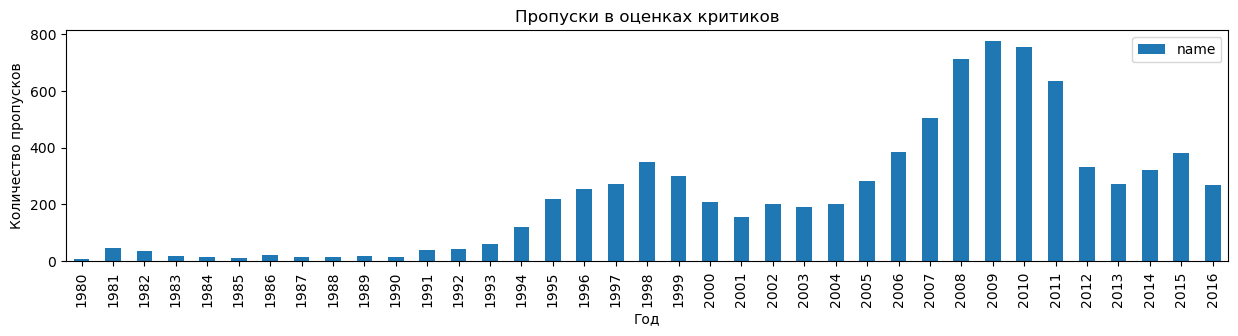

In [139]:
(
data[data['critic_score'].isna()]
    .pivot_table(index='year_of_release', values='name', aggfunc='count')
    .plot(kind='bar', y='name', figsize=(15,3))
);
plt.title('Пропуски в оценках критиков')
plt.xlabel('Год')
plt.ylabel('Количество пропусков')
plt.show()

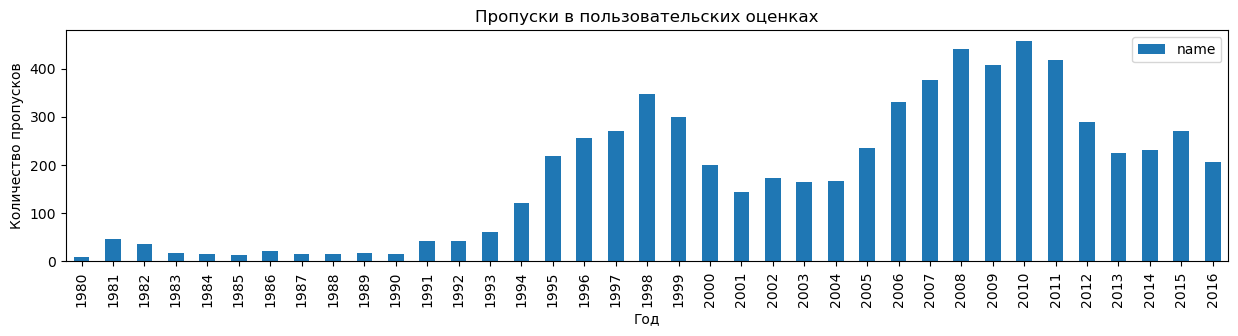

In [140]:
(
data[data['user_score'].isna()]
    .pivot_table(index='year_of_release', values='name', aggfunc='count')
    .plot(kind='bar', y='name', figsize=(15,3))
);
plt.title('Пропуски в пользовательских оценках')
plt.xlabel('Год')
plt.ylabel('Количество пропусков')
plt.show()

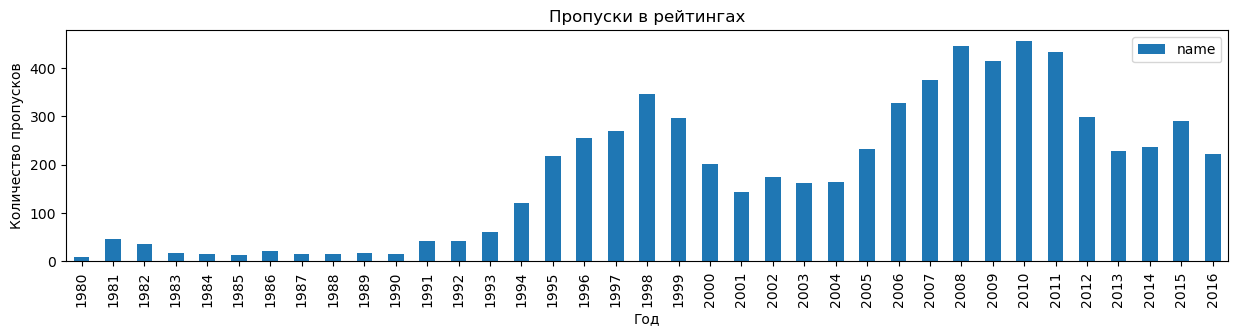

In [141]:
(
data[data['rating'].isna()]
    .pivot_table(index='year_of_release', values='name', aggfunc='count')
    .plot(kind='bar', y='name', figsize=(15,3))
);
plt.title('Пропуски в рейтингах')
plt.xlabel('Год')
plt.ylabel('Количество пропусков')
plt.show()

Заодно проверим оценку 'tbd' в пользовательских оценках.

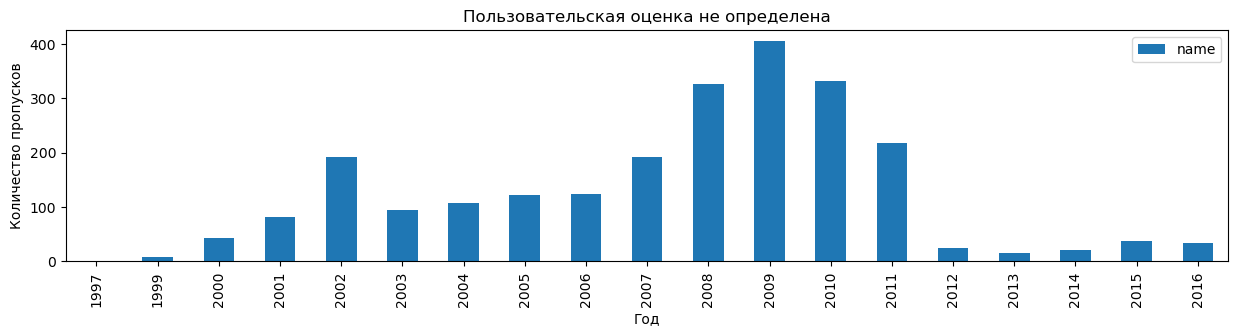

In [142]:
(
data[data['user_score']=='tbd']
    .pivot_table(index='year_of_release', values='name', aggfunc='count')
    .plot(kind='bar', y='name', figsize=(15,3))
);
plt.title('Пользовательская оценка не определена')
plt.xlabel('Год')
plt.ylabel('Количество пропусков')
plt.show()

In [143]:
data[data['user_score']=='tbd'].sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
3228,Family Feud: 2010 Edition,Wii,2009,Misc,0.58,0.00,0.0,0.04,NaN,tbd,E
8403,Surf's Up,Wii,2007,Sports,0.15,0.00,0.0,0.01,64.0,tbd,E10+
10850,NFL Blitz 20-02,XB,2002,Sports,0.07,0.02,0.0,0.00,77.0,tbd,E
14090,Just Dance 2017,X360,2016,Misc,0.02,0.02,0.0,0.00,NaN,tbd,E10+
6167,Disney's Treasure Planet,GBA,2002,Action,0.20,0.07,0.0,0.01,68.0,tbd,E


Можно было бы предположить, что аббревиатура 'tbd' использована для анонсированных игр, но пик в 2009 году указывает скорее на заполнение таким способом отсутствующих оценок.

Максимальное количество пропусков в оценках и рейтинге наблюдается в 1995-2000 и 2006-2012 годах.

Попробуем найти причины появления пропусков, отличные от даты выхода.

In [144]:
data[data['critic_score'].isna()].sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
11308,Are You Smarter Than a 5th Grader? Back to School,DS,2010,Misc,0.08,0.00,0.00,0.01,NaN,tbd,E
2518,Rocket Power: Beach Bandits,PS2,2002,Platform,0.40,0.31,0.00,0.10,NaN,6.6,E
14857,Schlag den Raab,PC,2010,Misc,0.00,0.02,0.00,0.00,NaN,NaN,NaN
16496,God Eater Off Shot: Tachibana Sakuya-hen Twin ...,PS4,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
5003,Raving Rabbids: Travel in Time 3D,3DS,2011,Platform,0.11,0.23,0.00,0.04,NaN,NaN,NaN


In [145]:
data[data['critic_score'].isna()]['genre'].value_counts().head(8) #проверка жанров

Action          1456
Misc            1212
Sports          1141
Adventure        973
Role-Playing     750
Simulation       509
Racing           501
Fighting         432
Name: genre, dtype: int64

In [146]:
data[data['critic_score'].isna()]['platform'].value_counts().head(8) #проверка игровых платформ

DS     1413
PS      994
PS2     852
PSP     737
Wii     718
PS3     502
GBA     381
3DS     346
Name: platform, dtype: int64

In [147]:
data[data['critic_score'].isna()]['na_sales'].count() #проверка региональных продаж

8461

In [148]:
data[data['critic_score'].isna()]['eu_sales'].count() #проверка региональных продаж

8461

In [149]:
data[data['critic_score'].isna()]['jp_sales'].count() #проверка региональных продаж

8461

In [150]:
data[data['critic_score'].isna()]['other_sales'].count() #проверка региональных продаж

8461

Явные закономерности в появлении пропусков не выявлены. Отсутствие оценок может быть связано с низкой популярностью конкретных игр.

In [151]:
print('Пропусков в пользовательских оценках:', data[data['user_score'].isna()].shape[0])
print('Пропусков в оценках критиков:', data[data['critic_score'].isna()].shape[0])
print('Совпадений в пропусках:', data[(data['user_score'].isna())&(data['critic_score'].isna())].shape[0])

Пропусков в пользовательских оценках: 6605
Пропусков в оценках критиков: 8461
Совпадений в пропусках: 6572


Подсчитаем процент игр без оценок от общего количества игр за каждый год.

In [152]:
data['year_of_release'].value_counts().reset_index().sort_values(by='index').head(6) #общее количество игр

,index,year_of_release
36,1980,9
24,1981,46
27,1982,36
30,1983,17
35,1984,14
34,1985,14


In [153]:
#количество игр без оценки
(
    data[data['critic_score'].isna()]['year_of_release']
    .value_counts().reset_index().sort_values(by='index').head(6) 
)

,index,year_of_release
36,1980,9
24,1981,46
27,1982,36
29,1983,17
34,1984,14
35,1985,13


In [154]:
data['year_of_release'].value_counts().reset_index().sort_values(
    by='index', ascending=False).head(8) #общее количество игр

,index,year_of_release
14,2016,502
11,2015,606
12,2014,581
13,2013,544
10,2012,653
4,2011,1136
2,2010,1255
1,2009,1426


In [155]:
#количество игр без оценки
(
    data[data['critic_score'].isna()]['year_of_release']
    .value_counts().reset_index().sort_values(by='index', ascending=False).head(8)
)
#количество игр без оценки

,index,year_of_release
14,2016,270
6,2015,381
9,2014,320
13,2013,271
8,2012,332
3,2011,636
1,2010,755
0,2009,775


In [156]:
round(data.groupby('year_of_release')['critic_score'].count() / \
      data.groupby('year_of_release')['name'].count() * 100, 2) #если 0 - то 100% без оценок

year_of_release
1980     0.00
1981     0.00
1982     0.00
1983     0.00
1984     0.00
1985     7.14
1986     0.00
1987     0.00
1988     6.67
1989     0.00
1990     0.00
1991     0.00
1992     2.33
1993     0.00
1994     0.83
1995     0.00
1996     3.04
1997     5.88
1998     7.39
1999    11.54
2000    40.86
2001    67.63
2002    75.63
2003    75.48
2004    73.62
2005    69.76
2006    61.63
2007    57.81
2008    50.11
2009    45.65
2010    39.84
2011    44.01
2012    49.16
2013    50.18
2014    44.92
2015    37.13
2016    46.22
dtype: float64

До 2000 года большинство игр не имело оценки критиков, после 2000 года - около половины игр без такой оценки.

Проверим, аналогичная ли ситуация с пользовательскими оценками (не забудем и про tbd).

In [157]:
round(data[data['user_score'] != 'tbd'].groupby('year_of_release')['user_score'].count() / \
      data.groupby('year_of_release')['name'].count() * 100, 2) #если 0 - то 100% без оценок

year_of_release
1980     0.00
1981     0.00
1982     0.00
1983     0.00
1984     0.00
1985     7.14
1986     0.00
1987     0.00
1988     6.67
1989     0.00
1990     0.00
1991     0.00
1992     2.33
1993     0.00
1994     0.83
1995     0.00
1996     3.04
1997     6.23
1998     8.18
1999     9.17
2000    30.57
2001    53.32
2002    55.97
2003    66.58
2004    64.17
2005    62.09
2006    54.87
2007    52.55
2008    46.32
2009    43.06
2010    37.21
2011    44.10
2012    51.91
2013    55.88
2014    56.63
2015    49.01
2016    52.19
dtype: float64

Пользовательские оценки, как и оценки критиков, начинают массово появляться с 2000 года, но до сих пор (2016) охватывают только около половины игр.

Произведём замену 'tbd' в столбце пользовательских оценок, а также пропусков в значениях оценок и рейтинга на 'na'. В случае, если в будущем понадобится посчитать средние значения, выполнить сортировку или подобные операции, можно будет отфильтровать данные.

In [158]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = 'na'

In [159]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'na', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [160]:
# заполним пропуски
data['user_score'] = data['user_score'].fillna('na')
data['critic_score'] = data['critic_score'].fillna('na')
data['rating'] = data['rating'].fillna('na')

In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  object 
 9   user_score       16444 non-null  object 
 10  rating           16444 non-null  object 
dtypes: float64(4), int32(1), object(6)
memory usage: 1.4+ MB


### Дубликаты

In [162]:
# количество дубликатов
data.duplicated().sum()

0

Дубликаты отсутствуют.

Проверим, есть ли неявные дубликаты в названиях игровых платформ и жанров.

In [163]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [164]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Неявных дубликатов нет.

### Суммарные продажи

Добавим столбец с суммарными продажами игр во всех регионах.

In [165]:
#data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [166]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [167]:
data.sample(random_state=1) #проверка

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14082,Stadium Games,GBA,2003,Sports,0.03,0.01,0.0,0.0,na,na,na,0.04


## Исследовательский анализ данных

### Динамика выпуска игр по годам

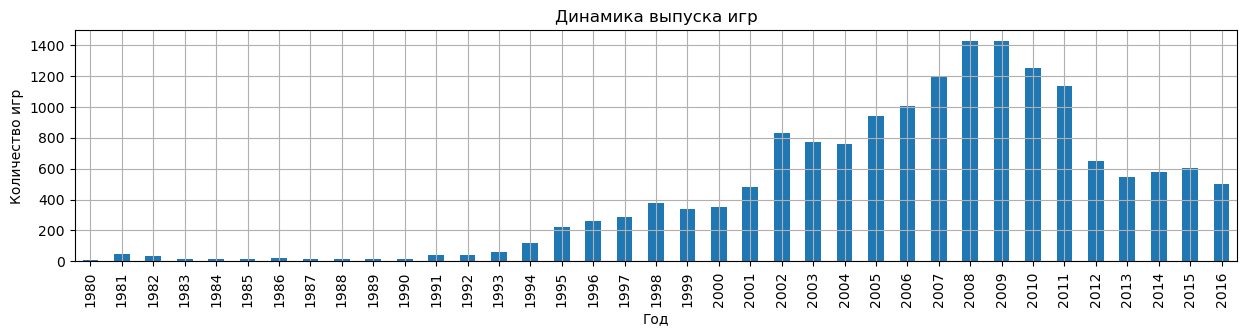

In [168]:
(
data.pivot_table(index='year_of_release', values='name', aggfunc='count')
    .plot(kind='bar', y='name', figsize=(15,3), legend=False, grid=True)
);
plt.title('Динамика выпуска игр')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.show()

В начале 2000-х годов начался рост количества выпускаемых игр с пиком в 2008-2009 годах. Затем началось снижение данного показателя, и с 2012 года года количество игр держится примерно на одном уровне.

### Распределение продаж по платформам

Посмотрим распределение продаж по всем платформам.

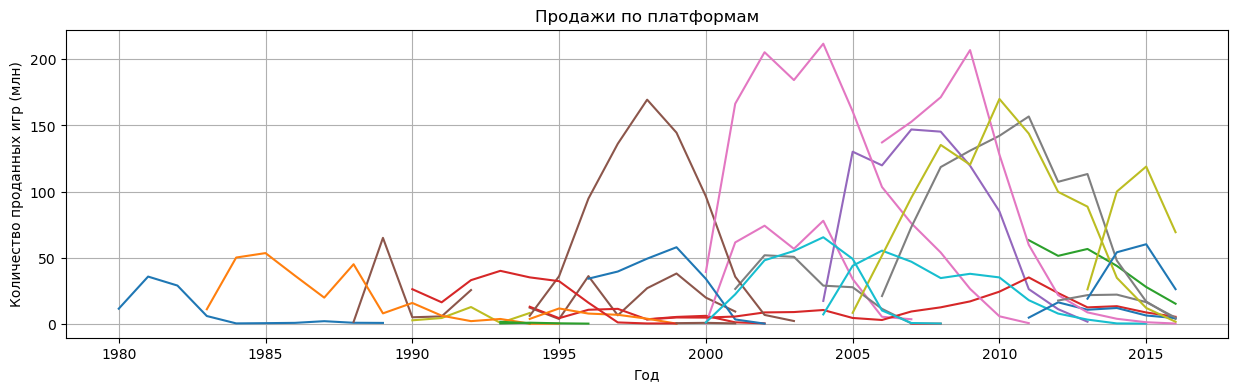

In [169]:
(
    data
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
    .plot(figsize=(15,4), legend=False, grid=True)
);
plt.title('Продажи по платформам')
plt.xlabel('Год')
plt.ylabel('Количество проданных игр (млн)')
plt.show()

Оставим самые популярные (по продажам игр) платформы.

In [170]:
len(data['platform'].unique()) # общее количество платформ

31

In [171]:
top10 = data.pivot_table(index='platform', values='total_sales', aggfunc='sum')\
        .sort_values(by='total_sales', ascending=False).head(10)

In [172]:
top10

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Топ-10 занят игровыми приставками.

In [173]:
#top10.index

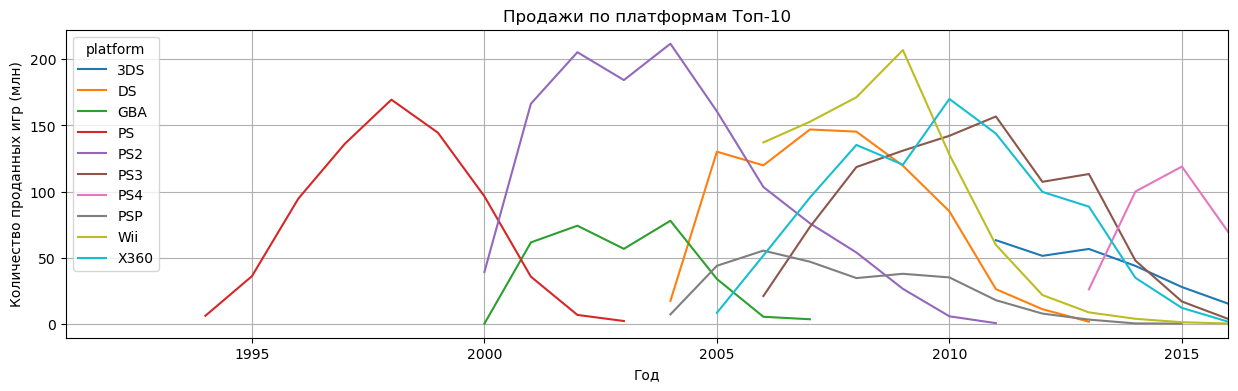

In [174]:
(
    data
    .query('platform in @top10.index')
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
    .plot(figsize=(15,4), legend=True, grid=True, xlim=(1991,2016))
);
plt.title('Продажи по платформам Топ-10')
plt.xlabel('Год')
plt.ylabel('Количество проданных игр (млн)')
plt.show()

Игровые приставки живут около 10 лет. Быстрый рост популярности, несколько лет стабильного спроса и постепенное угасание.

В качестве актуального возьмем период за 4 года, с 2013 г. В этом году стартовали продажи PS4, самой современной консоли из лидеров по продажам игр на момент 2016 г.

### Анализ актуального периода

Создадим отдельную таблицу с данными за актуальный период (с играми, выпущенными с 2013 года).

In [175]:
actual_data=data[data['year_of_release'] >= 2013]

Посмотрим, какие платформы остались.

In [176]:
len(actual_data['platform'].unique()) #количество

11

In [177]:
actual_data['platform'].unique() #список

array(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV',
       'DS', 'PSP'], dtype=object)

#### Динамика продаж

Проанализируем динамику продаж.

In [178]:
#сортировка по общим продажам игр
actual_data.pivot_table(
    index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

,total_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


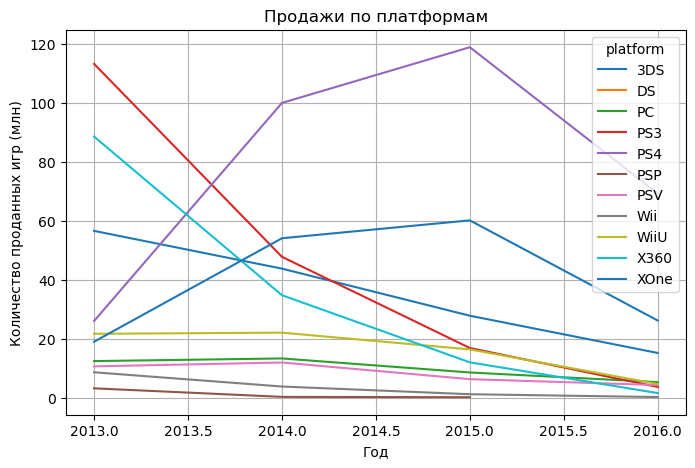

In [179]:
(
    actual_data
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
    .plot(figsize=(8,5), legend=True, grid=True)
)
plt.title('Продажи по платформам')
plt.xlabel('Год')
plt.ylabel('Количество проданных игр (млн)')
plt.show()

In [180]:
# таблица продаж
actual_data.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


Лидируют по общим продажам PlayStation в лице PS4 и PS3, Xbox в лице XOne и X360, а также 3DS от Nintendo.<br>
По состоянию на 2016 год - PS4, XOne и 3DS. Продажи на консолях прошлого поколения быстро уменьшаются, а на актуальных - прошли пик в 2015 г. и перешли к снижению.<br>
В аутсайдерах PSP, продажи игр на которой прекратились в 2015 г. и Wii. Также есть DS с минимальным результатом и отсутствием продаж с 2013 г. <br>
Положительной динамики продаж не наблюдается.

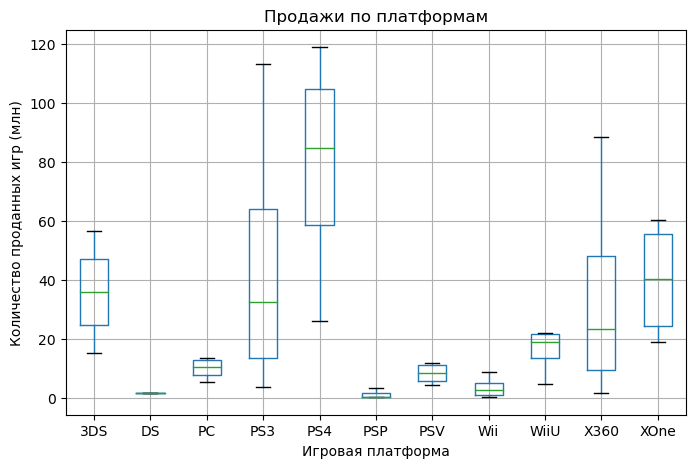

In [181]:
(
    actual_data
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
    .boxplot(figsize=(8,5), grid=True)
)
plt.title('Продажи по платформам')
plt.xlabel('Игровая платформа')
plt.ylabel('Количество проданных игр (млн)')
plt.show()

Самая привлекательная платформа - PS4. <br>По сравнению с Xbox (главным конкурентом), PlayStation не только показывает лучшие результаты по абсолютным продажам, но и лучшую динамику продажи игр на консолях нового поколения.

#### Влияние отзывов (оценок) на продажи

Посмотрим, как влияют на продажи игр для PS4 отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

Для изучения влияния оценок уберем игры без оценок и приведем оценки к типу float.

In [182]:
actual_data_score = actual_data[(actual_data['user_score']!='na')&(actual_data['critic_score']!='na')]

In [183]:
actual_data_score['user_score'] = actual_data_score['user_score'].astype('float')

C:\Users\Sergey\AppData\Local\Temp\ipykernel_17332\1378161994.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual_data_score['user_score'] = actual_data_score['user_score'].astype('float')


In [184]:
actual_data_score['critic_score'] = actual_data_score['critic_score'].astype('float')

C:\Users\Sergey\AppData\Local\Temp\ipykernel_17332\1597001370.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual_data_score['critic_score'] = actual_data_score['critic_score'].astype('float')


In [185]:
actual_data_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 976 entries, 16 to 16692
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             976 non-null    object 
 1   platform         976 non-null    object 
 2   year_of_release  976 non-null    int32  
 3   genre            976 non-null    object 
 4   na_sales         976 non-null    float64
 5   eu_sales         976 non-null    float64
 6   jp_sales         976 non-null    float64
 7   other_sales      976 non-null    float64
 8   critic_score     976 non-null    float64
 9   user_score       976 non-null    float64
 10  rating           976 non-null    object 
 11  total_sales      976 non-null    float64
dtypes: float64(7), int32(1), object(4)
memory usage: 95.3+ KB


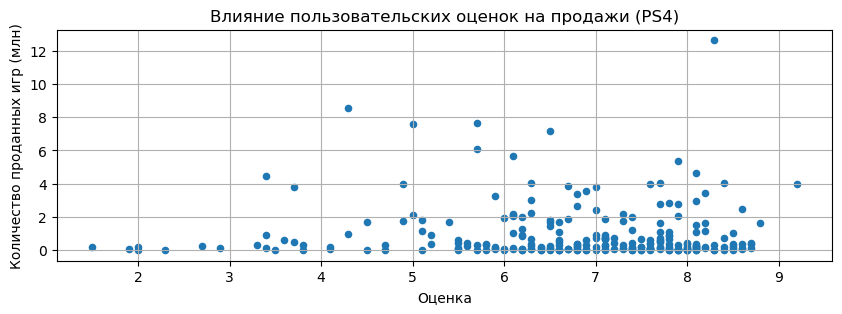

In [186]:
actual_data_score[actual_data_score['platform']=='PS4']\
    .plot(x='user_score', y='total_sales', kind='scatter', grid=True, figsize=(10,3))
plt.title('Влияние пользовательских оценок на продажи (PS4)')
plt.xlabel('Оценка')
plt.ylabel('Количество проданных игр (млн)')
plt.show()

In [187]:
print(actual_data_score.loc[actual_data_score['platform']=='PS4', 'user_score']
      .corr(actual_data_score.loc[actual_data_score['platform']=='PS4', 'total_sales']))

-0.03362497596528878


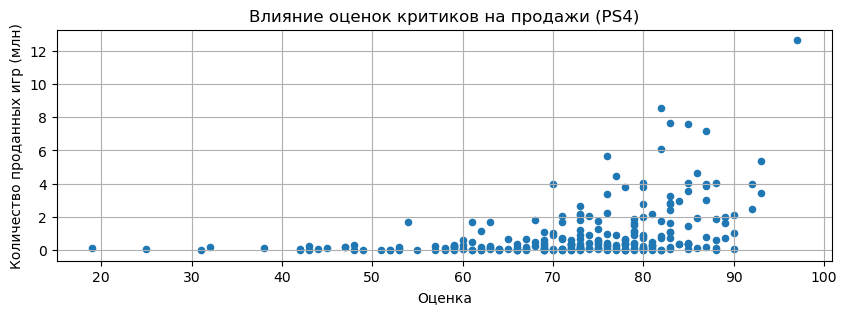

In [190]:
actual_data_score[actual_data_score['platform']=='PS4']\
    .plot(x='critic_score', y='total_sales', kind='scatter', grid=True, figsize=(10,3))
plt.title('Влияние оценок критиков на продажи (PS4)')
plt.xlabel('Оценка')
plt.ylabel('Количество проданных игр (млн)')
plt.show()

In [191]:
print(actual_data_score.loc[actual_data_score['platform']=='PS4', 'critic_score']
      .corr(actual_data_score.loc[actual_data_score['platform']=='PS4', 'total_sales']))

0.40589480145836687


Вывод: корреляция между высокими пользовательскими оценками и хорошими продажами отсутствует. Для оценок критиков такая корреляция есть, но не сильная.<br>
В целом, игры с оценкой в верхней половине шкалы покупают чаще, чем игры с низкими оценками.

Проверим полученные выводы на других платформах - PS3, XOne, X360, 3DS, WiiU и PC.

PS3


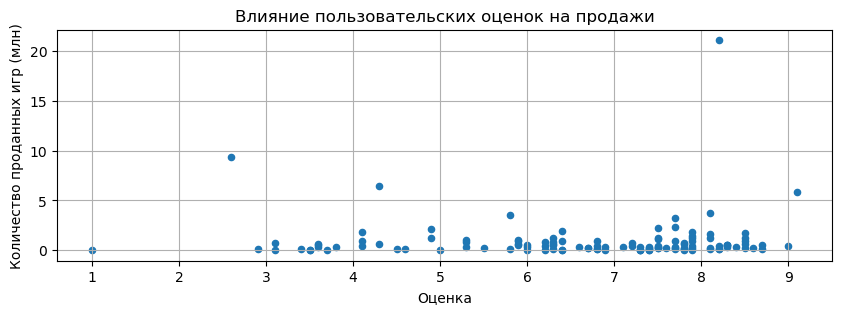

Корреляция: 0.02269094327112414


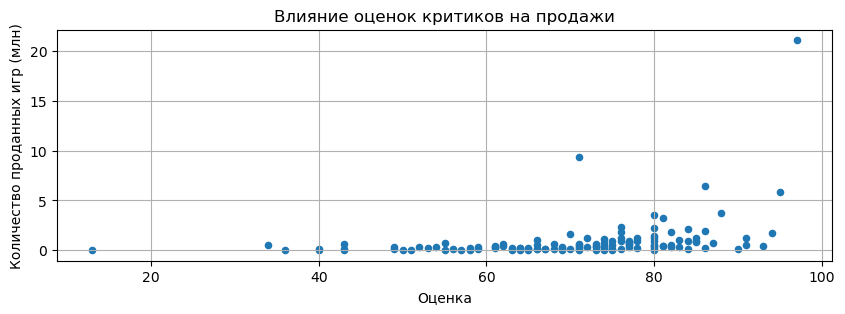

Корреляция: 0.33380663565061736

XOne


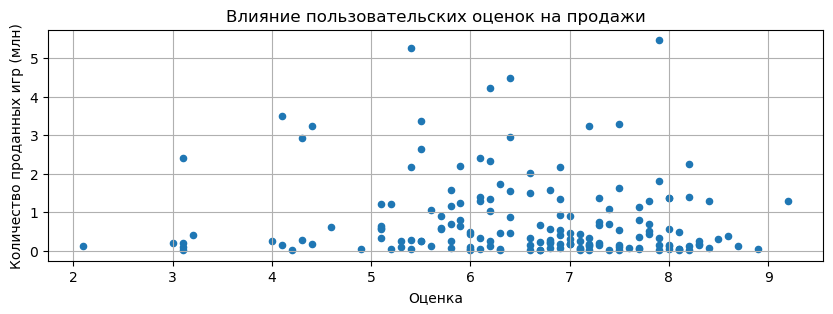

Корреляция: -0.09400318326920852


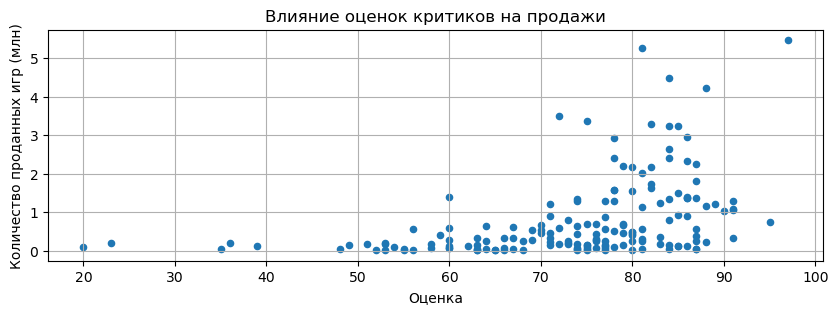

Корреляция: 0.41042203561296375

X360


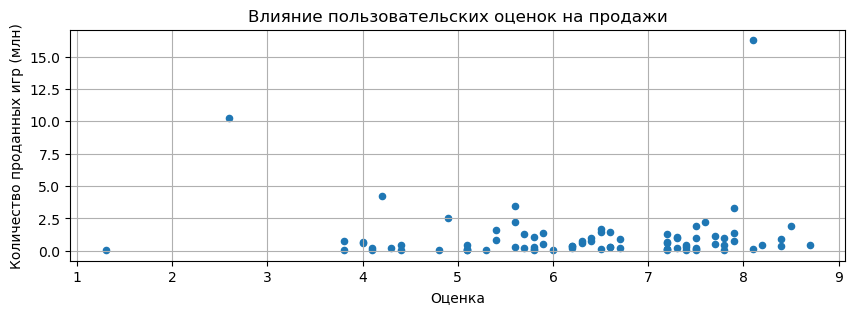

Корреляция: -0.006238179532306317


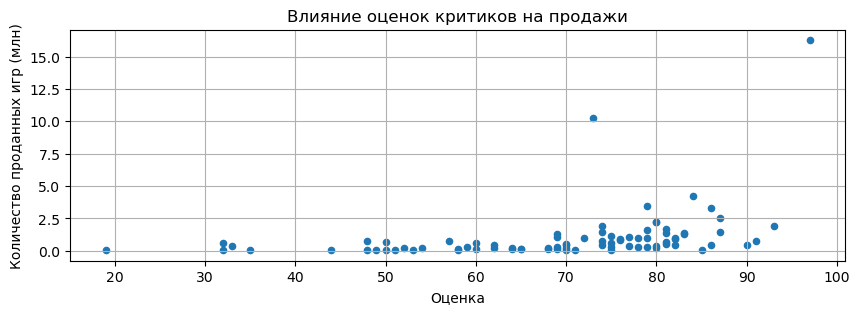

Корреляция: 0.3503445460228664

3DS


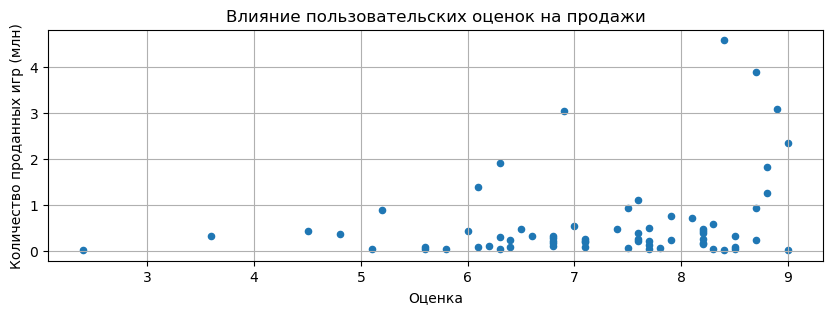

Корреляция: 0.2729904366942444


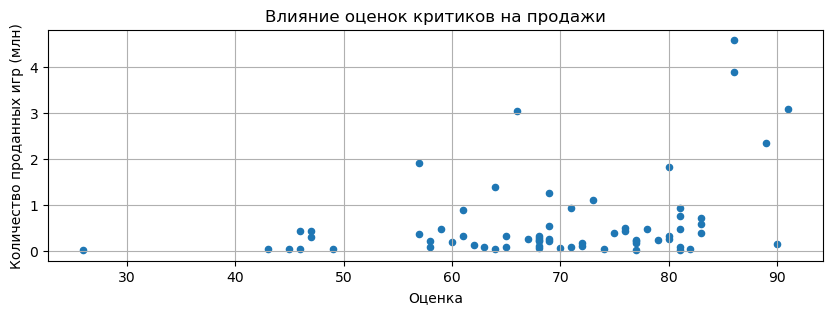

Корреляция: 0.3392349287853147

WiiU


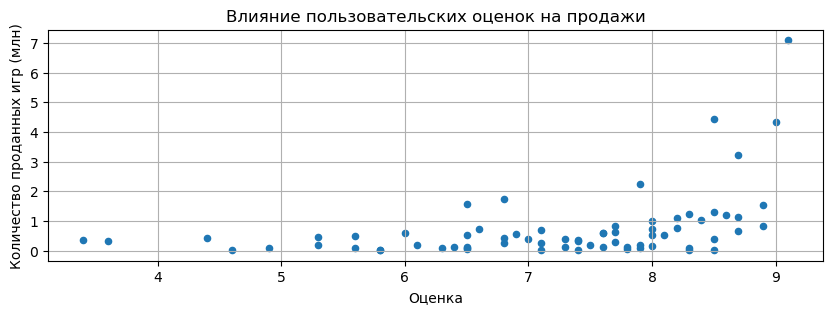

Корреляция: 0.40869174384926477


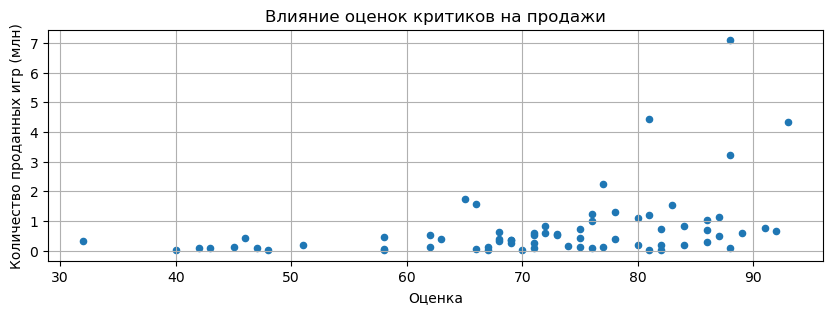

Корреляция: 0.37950449899784144

PC


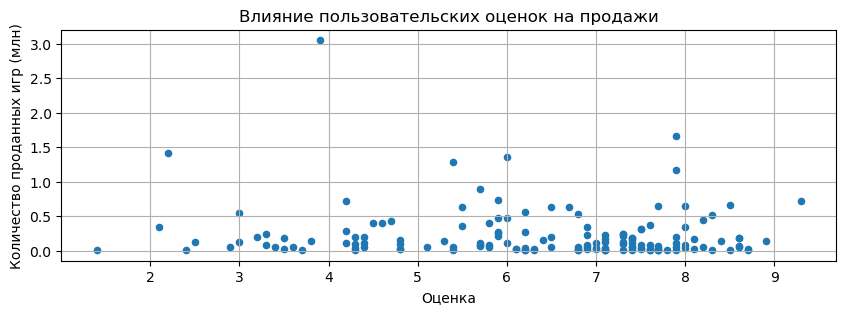

Корреляция: -0.10923502736171779


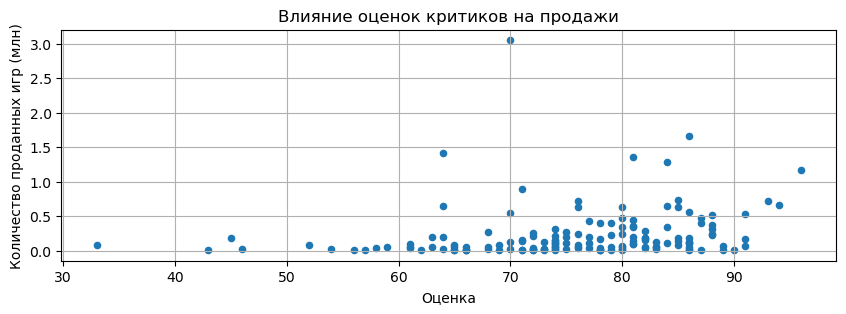

Корреляция: 0.19412407903472956



In [192]:
for platform in ['PS3', 'XOne', 'X360', '3DS', 'WiiU', 'PC']:
    
    print(platform)
    
    # график 1
    actual_data_score[actual_data_score['platform']==platform]\
    .plot(x='user_score', y='total_sales', kind='scatter', grid=True, figsize=(10,3))
    plt.title('Влияние пользовательских оценок на продажи')
    plt.xlabel('Оценка')
    plt.ylabel('Количество проданных игр (млн)')
    plt.show()
    
    print('Корреляция:', actual_data_score.loc[actual_data_score['platform']==platform, 'user_score']
      .corr(actual_data_score.loc[actual_data_score['platform']==platform, 'total_sales']))
    
    # график 2
    actual_data_score[actual_data_score['platform']==platform]\
    .plot(x='critic_score', y='total_sales', kind='scatter', grid=True, figsize=(10,3))
    plt.title('Влияние оценок критиков на продажи')
    plt.xlabel('Оценка')
    plt.ylabel('Количество проданных игр (млн)')
    plt.show()
    
    print('Корреляция:', actual_data_score.loc[actual_data_score['platform']==platform, 'critic_score']
      .corr(actual_data_score.loc[actual_data_score['platform']==platform, 'total_sales']))
    
    print()

На других платформах ситуация аналогична.

#### Распределение по жанрам

Посмотрим на общее распределение игр по жанрам.

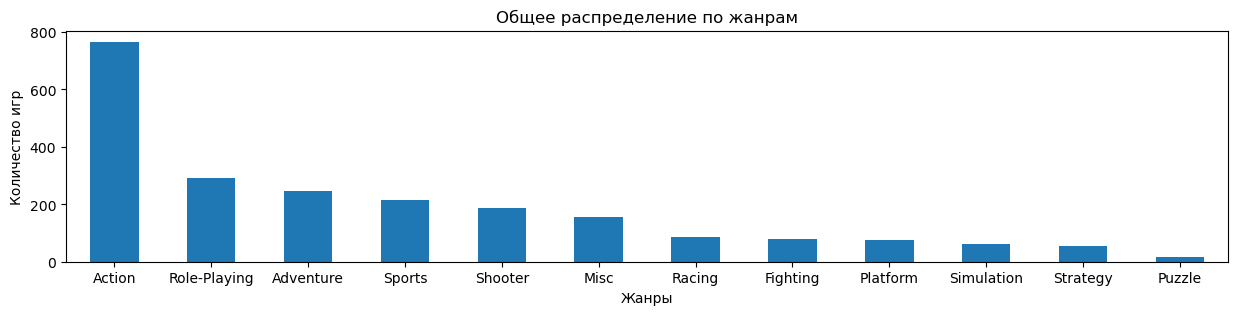

In [195]:
(
    actual_data
    .pivot_table(index='genre', values='name', aggfunc='count').sort_values(by='name', ascending=False)
    .plot(kind='bar', y='name', figsize=(15,3), legend=False)
)
plt.title('Общее распределение по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Количество игр')
plt.xticks(rotation=0)
plt.show()

Посмотрим, какие жанры лидируют по продажам.

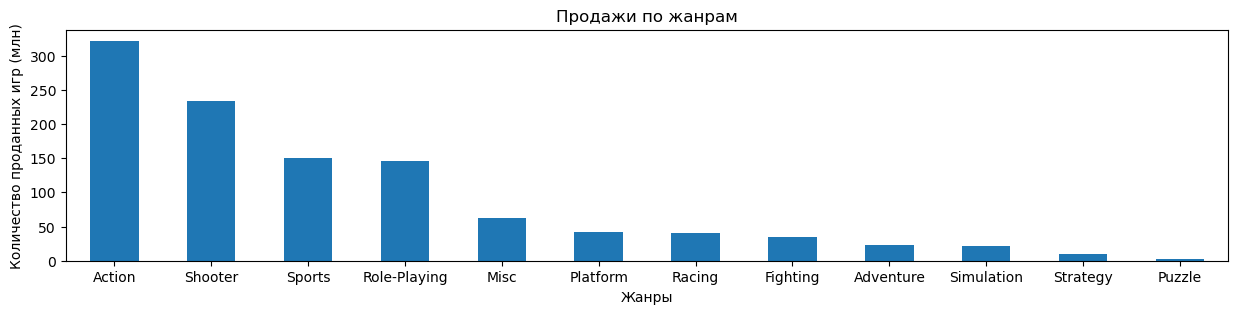

In [196]:
(
    actual_data
    .pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
    .plot(kind='bar', y='total_sales', figsize=(15,3), legend=False)
)
plt.title('Продажи по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Количество проданных игр (млн)')
plt.xticks(rotation=0)
plt.show()

Жанр Action лидирует, но интереснее посмотреть на шутеры. Имея почти в 4 раза меньше игр, шутеры занимают второе место по продажам. Из этого следует, что в среднем количество продаж на одну игру у шутеров больше.

Проверим вышеуказанное утверждение.

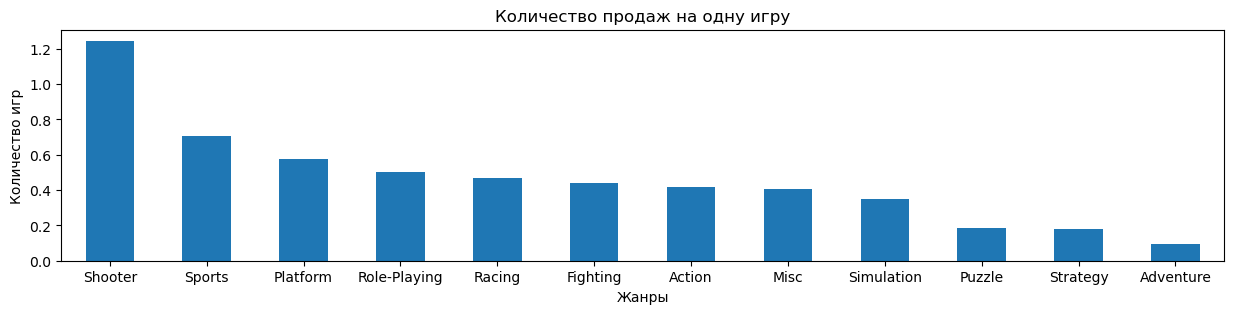

In [197]:
(
    (actual_data.groupby('genre')['total_sales'].sum() / 
     actual_data.groupby('genre')['name'].count()).sort_values(ascending=False)
    .plot(kind='bar', y='genre', figsize=(15,3), legend=False)
)
plt.title('Количество продаж на одну игру')
plt.xlabel('Жанры')
plt.ylabel('Количество игр')
plt.xticks(rotation=0)
plt.show()

In [198]:
print(actual_data[actual_data['genre']=='Shooter'].shape[0])
actual_data[actual_data['genre']=='Shooter'].sort_values(by='total_sales', ascending=False).head()

187


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,na,na,na,14.63
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,na,na,na,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66


In [77]:
print(actual_data[actual_data['genre']=='Action'].shape[0])
actual_data[actual_data['genre']=='Action'].sort_values(by='total_sales', ascending=False).head()

766


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
149,The Last of Us,PS3,2013,Action,2.41,2.18,0.28,0.99,95.0,9.1,M,5.86
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47


Вывод: первенство по числу продаж у жанра Action. Но по количеству продаж на одну игру выигрывают шутеры.  Также хорошо продаются спортивные игры и РПГ. <br>
Наименее продаваемыми играми являются пазлы, стратегии и симуляторы.

### Портрет пользователя каждого региона

#### Топ-5 популярных платформ

In [199]:
a_d_na=actual_data.pivot_table(index='platform', values='na_sales', aggfunc='sum')\
    .sort_values(by='na_sales', ascending=False).head(5)

In [200]:
a_d_na

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20


In [201]:
a_d_eu=actual_data.pivot_table(index='platform', values='eu_sales', aggfunc='sum')\
    .sort_values(by='eu_sales', ascending=False).head(5)

In [202]:
a_d_eu

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96


In [203]:
a_d_jp=actual_data.pivot_table(index='platform', values='jp_sales', aggfunc='sum')\
    .sort_values(by='jp_sales', ascending=False).head(5)

In [204]:
a_d_jp

,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88


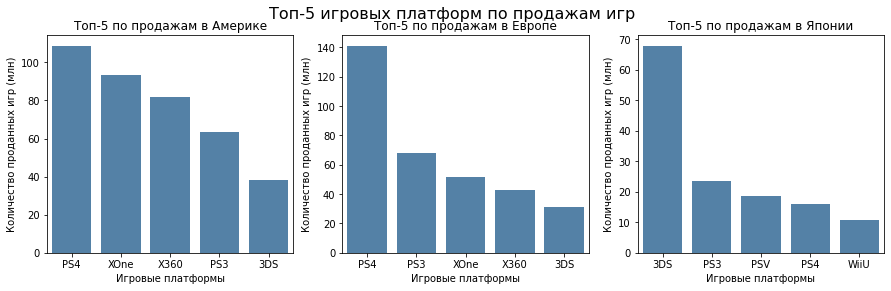

In [85]:
# столбчатый график
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15,4)) #3 графика в одной строке

sns.barplot(data=a_d_na, x=a_d_na.index, y=a_d_na['na_sales'], color='#4682B4', ax=ax1)
ax1.set_title('Топ-5 по продажам в Америке')
ax1.set_xlabel('Игровые платформы')
ax1.set_ylabel('Количество проданных игр (млн)')

sns.barplot(data=a_d_eu, x=a_d_eu.index, y=a_d_eu['eu_sales'], color='#4682B4', ax=ax2)
ax2.set_title('Топ-5 по продажам в Европе')
ax2.set_xlabel('Игровые платформы')
ax2.set_ylabel('Количество проданных игр (млн)')

sns.barplot(data=a_d_jp, x=a_d_jp.index, y=a_d_jp['jp_sales'], color='#4682B4', ax=ax3)
ax3.set_title('Топ-5 по продажам в Японии')
ax3.set_xlabel('Игровые платформы')
ax3.set_ylabel('Количество проданных игр (млн)')

fig.suptitle('Топ-5 игровых платформ по продажам игр', fontsize=16);

В Европе и Северной Америке первые четыре места занимают приставки от PlayStation и Xbox, но доля PS в Европе больше. Первое место у PS4, причем в Европе PS4 выигрывает с большим отрывом. Пятое место занимает 3DS.<br>
В Японии ситуация отличается. На первом месте с огромным отрывом 3DS, а продукция Xbox даже не входит в первую пятерку.

#### Топ-5 популярных жанров

In [86]:
actual_top5_genre_na = actual_data.pivot_table\
    (index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head(5)

In [87]:
actual_top5_genre_eu = actual_data.pivot_table\
    (index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head(5)

In [88]:
actual_top5_genre_jp = actual_data.pivot_table\
    (index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head(5)

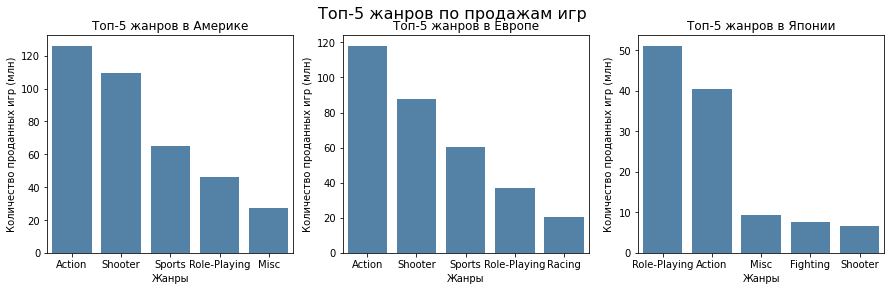

In [89]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15,4)) #3 графика в одной строке

sns.barplot(data=actual_top5_genre_na, x=actual_top5_genre_na.index, 
            y=actual_top5_genre_na['na_sales'], color='#4682B4', ax=ax1)
ax1.set_title('Топ-5 жанров в Америке')
ax1.set_xlabel('Жанры')
ax1.set_ylabel('Количество проданных игр (млн)')

sns.barplot(data=actual_top5_genre_eu, x=actual_top5_genre_eu.index, 
            y=actual_top5_genre_eu['eu_sales'], color='#4682B4', ax=ax2)
ax2.set_title('Топ-5 жанров в Европе')
ax2.set_xlabel('Жанры')
ax2.set_ylabel('Количество проданных игр (млн)')

sns.barplot(data=actual_top5_genre_jp, x=actual_top5_genre_jp.index, 
            y=actual_top5_genre_jp['jp_sales'], color='#4682B4', ax=ax3)
ax3.set_title('Топ-5 жанров в Японии')
ax3.set_xlabel('Жанры')
ax3.set_ylabel('Количество проданных игр (млн)')

fig.suptitle('Топ-5 жанров по продажам игр', fontsize=16);

Жанровые предпочтения в Америке и Европе похожи. Лучше продаются игры жанров Action, Shooter и Sports. <br>
В Японии выделяются два жанра - Role-Playing и Action. Shooter замыкают первую пятерку. Одна из причин жанровых различий - популярность разных игровых платформ. На 3DS мало шутеров.

#### Влияние рейтинга ESRB на продажи

In [90]:
actual_data['rating'].unique()

array(['M', 'na', 'E', 'T', 'E10+'], dtype=object)

In [91]:
actual_data_rating = actual_data[actual_data['rating'] != 'na'] # уберём пропуски

In [92]:
actual_data_rating['rating'].unique()

array(['M', 'E', 'T', 'E10+'], dtype=object)

In [93]:
actual_data_rating['rating'].value_counts()

M       369
T       333
E       302
E10+    252
Name: rating, dtype: int64

In [94]:
actual_rating_na = actual_data_rating.pivot_table(index='rating', values='na_sales', aggfunc='sum').head(5)

In [95]:
actual_rating_na

,na_sales
rating,
E,79.05
E10+,54.24
M,165.21
T,49.79


In [96]:
actual_rating_eu = actual_data_rating.pivot_table(index='rating', values='eu_sales', aggfunc='sum').head(5)

In [97]:
actual_rating_eu

,eu_sales
rating,
E,83.36
E10+,42.69
M,145.32
T,41.95


In [98]:
actual_rating_jp = actual_data_rating.pivot_table(index='rating', values='jp_sales', aggfunc='sum').head(5)

In [99]:
actual_rating_jp

,jp_sales
rating,
E,15.14
E10+,5.89
M,14.11
T,20.59


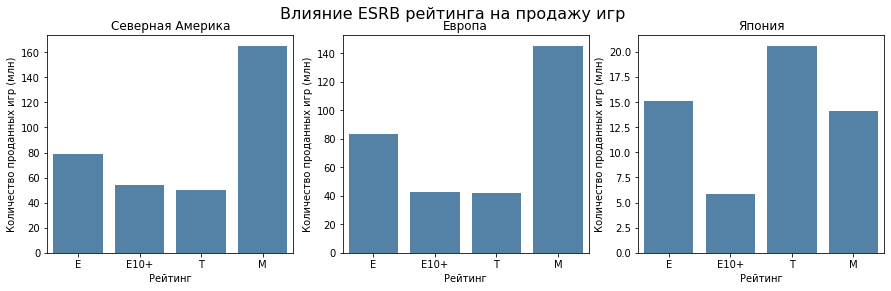

In [100]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15,4)) #3 графика в одной строке

sns.barplot(data=actual_rating_na, x=actual_rating_na.index, 
            y=actual_rating_na['na_sales'], color='#4682B4', 
            order=['E', 'E10+', 'T', 'M'], ax=ax1)              #порядок по ужесточению рейтинга
ax1.set_title('Северная Америка')
ax1.set_xlabel('Рейтинг')
ax1.set_ylabel('Количество проданных игр (млн)')

sns.barplot(data=actual_rating_eu, x=actual_rating_eu.index, 
            y=actual_rating_eu['eu_sales'], color='#4682B4', 
            order=['E', 'E10+', 'T', 'M'], ax=ax2)
ax2.set_title('Европа')
ax2.set_xlabel('Рейтинг')
ax2.set_ylabel('Количество проданных игр (млн)')

sns.barplot(data=actual_rating_jp, x=actual_rating_jp.index, 
            y=actual_rating_jp['jp_sales'], color='#4682B4', 
            order=['E', 'E10+', 'T', 'M'], ax=ax3)
ax3.set_title('Япония')
ax3.set_xlabel('Рейтинг')
ax3.set_ylabel('Количество проданных игр (млн)')

fig.suptitle('Влияние ESRB рейтинга на продажу игр', fontsize=16);

В Европе и Америке предпочитают игры для взрослых. На втором месте другая крайность - игры для всех. <br>
В Японии ESRB рейтинг меньше связан с числом продаж. На первом месте игры для лиц от 13 лет, на последнем - от 10 лет и старше.

### Проверка гипотез

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Используемый метод scipy.stats.ttest_ind (array1, array2, equal_var) проверяет гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам.

Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.<br>
Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC разные.

In [206]:
alpha = 0.05 #критический уровень статистической значимости
results = st.ttest_ind(actual_data_score.query('platform == "XOne"')['user_score'], 
                       actual_data_score.query('platform == "PC"')['user_score'], 
                       equal_var=False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.17882648263401307
Не получилось отвергнуть нулевую гипотезу


In [103]:
print('Средняя пользовательская оценка на Xbox One:', 
      round(actual_data_score.query('platform == "XOne"')['user_score'].mean(), 2))
print('Средняя пользовательская оценка на PC:', 
      round(actual_data_score.query('platform == "PC"')['user_score'].mean(), 2))

Средняя пользовательская оценка на Xbox One: 6.54
Средняя пользовательская оценка на PC: 6.3


#### Средние пользовательские рейтинги жанров Action и Sports разные.

Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports одинаковые.<br>
Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports разные.

In [207]:
alpha = 0.05 #критический уровень статистической значимости
results = st.ttest_ind(actual_data_score.query('genre == "Action"')['user_score'], 
                       actual_data_score.query('genre == "Sports"')['user_score'], 
                       equal_var=False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.0496920005008588e-13
Отвергаем нулевую гипотезу


In [106]:
print('Средняя пользовательская оценка жанра Action:', 
      round(actual_data_score.query('genre == "Action"')['user_score'].mean(), 2))
print('Средняя пользовательская оценка жанра Sports:', 
      round(actual_data_score.query('genre == "Sports"')['user_score'].mean(), 2))

Средняя пользовательская оценка жанра Action: 6.94
Средняя пользовательская оценка жанра Sports: 5.67


## Вывод

В рассматриваемых данных содержится информация о более чем 16 тысячах игр.<br>
Оценка или присвоенный ESRB рейтинг имеется примерно у половины игр. При этом, до 2000 года большинство игр вовсе не имело оценок.<br>
В начале 2000-х годов начался рост количества выпускаемых игр с пиком в 2008-2009 гг. Затем началось снижение данного показателя, и с 2012 года года количество игр держится примерно на одном уровне. <br>
Топ-10 по продаже игр занят игровыми приставками. В среднем игровые приставки живут около 10 лет.<br>

Для выявления закономерностей, определяющих успешность игры, взят актуальный период за 4 года, начиная с 2013 г. В этом году стартовали продажи PS4, самой современной консоли из лидеров по продажам игр на момент 2016 г.<br>

По результатам анализа динамики продаж, лидируют PlayStation в лице PS4 и PS3, Xbox в лице XOne и X360, а также 3DS от Nintendo.
По состоянию на 2016 год - PS4, XOne и 3DS. Продажи на консолях прошлого поколения снижаются с начала рассматриваемого периода, а на актуальных - прошли пик в 2015 г. и также снижаются.
В аутсайдерах по состоянию на 2016 г. находится Wii. <br>
Положительной динамики продаж ни на одной из платформ не наблюдается.<br>

Самая привлекательная платформа - PS4.<br>
По сравнению с Xbox (главным конкурентом), PlayStation не только показывает лучшие результаты по абсолютным продажам, но и лучшую динамику продажи игр на консолях нового поколения.<br>

Корреляция между высокими пользовательскими оценками и хорошими продажами отсутствует. Для оценок критиков такая корреляция есть, но не сильная.<br>
В целом, игры с оценкой в верхней половине шкалы покупают чаще, чем игры с низкими оценками.<br>

Жанр Action лидирует по продажам. Шутеры занимают второе место, имея при этом почти в 4 раза меньше игр.
Именно шутеры выигрывают по показателю количества продаж на одну игру.<br>
Наименее продаваемыми играми являются пазлы, стратегии и симуляторы.

В ходе проведенного анализа также изучены показатели продаж применительно к трём регионам - Северная Америка, Европа и Япония.<br>
В Европе и Северной Америке первые четыре места по продажам игр занимают приставки от PlayStation и Xbox, но доля PS в Европе больше. Первое место у PS4, причем в Европе PS4 выигрывает с большим отрывом. Пятое место занимает 3DS.<br>
В Японии ситуация отличается. На первом месте с огромным отрывом 3DS, а продукция Xbox даже не входит в первую пятерку.<br>

Жанровые предпочтения в Америке и Европе похожи. Лучше продаются игры жанров Action, Shooter и Sports.<br>
В Японии выделяются два жанра - Role-Playing и Action. Shooter замыкают первую пятерку. <br> 
Одна из причин жанровых различий - популярность разных игровых платформ. На 3DS мало шутеров.<br>

В Европе и Америке предпочитают игры для взрослых. На втором месте другая крайность - игры для всех.<br>
В Японии ESRB рейтинг меньше связан с числом продаж. На первом месте игры для лиц от 13 лет, на последнем - от 10 лет и старше.<br>

Также были проверены две гипотезы.<br>
Гипотеза о равенстве средних пользовательских рейтингов платформ Xbox One и PC не была отвергнута.<br>
Средняя оценка составила 6,54 для Xbox и 6,3 для PC.<br>

А вот гипотеза о равенстве средних пользовательских рейтингов жанров Action и Sports была отвергнута.<br>
Средняя оценка жанра Action составила 6.94, жанра Sports: 5.67.<br>

Таким образом, потенциально популярным продуктом для европейской аудитории будет экшн или шутер на PS4. Особое внимание следует обратить на продолжение популярных франшиз в этих жанрах. Также следует следить за появлением консолей нового поколения, особенно PS5.